# Bellabeat: How Can a Wellness Technology Company Play It Smart?

![header_img](assets/header_img.png)

This case study is part of the **Google Data Analytics Professional Certificate Capstone Project**.


Author: John Klenn Andrew P. Dungaran \
Date: April 2024

<br>

# INTRODUCTION

Welcome to the Bellabeat data analysis case study!

In this case study, I will perform real-world tasks of a junior data analyst. In order to answer the key business questions, I will follow the steps of the data analysis process: 

**Ask, Prepare, Process, Analyze, Share, and Act**. 

![analysis_process](assets/analysis_process.png)

### Background

I am a junior data analyst working on the **marketing analyst** team at Bellabeat, a high-tech manufacturer of health-focused products for women. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company.

I have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights I discover will then help guide marketing strategy for the company.

### Stakeholders and Products

* **Stakeholders**

    * **Urška Sršen**: Bellabeat’s cofounder and Chief Creative Officer
    * **Sando Mur**: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
    * **Bellabeat marketing analytics team**: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.

* **Products**

    * **Bellabeat app**: The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.
    * **Leaf**: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.
    * **Time**: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.
    * **Spring**: This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.
    * **Bellabeat membership**: Bellabeat also offers a subscription-based membership program for users. Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.

<br>
<br>

# STEP 1: ASK

### 1.1 Business Task

Analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices. Then, select one Bellabeat product to apply these insights for Bellabeat marketing strategy.

### 1.2 Business Objectives

1. What are the trends identified?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

### 1.3 Deliverables

1. A clear summary of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top high-level content recommendations based on your analysis

<br>
<br>

# STEP 2: PREPARE

### 2.1 Data Information

* The data was retrieve publicly from Kaggle: [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit).
* The database is segmented into 18 different csv files with lots of details about the user's behaviour.
* It contains personal fitness tracker from thirty (30) fitbit users who gave their consent.
* The data includes minute-level output for physical activities, heart rate, sleep monitoring, daily activity, and steps.

### 2.2 Data Limitations

* **Small Sample Size**: The sample size of 30 female users is not representative of the entire female population.
* **Outdated**: Data collected from 2016. Daily activities from users may have changed overtime making the data unreliable.
* **Prone to Bias**: The data did not provide demographic information other than that they are all female which could lead to bias or discrepancies in the analysis.

<br>
<br>

# STEP 3: PROCESS

The tool which I will be using is Python since it can do Data Preparation, Analysis, and Visualization.


### 3.1 Imports

In [1]:
# Importing libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
# Importing the data.

df_daily_activity = pd.read_csv('Datasets/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
df_hourly_intensities = pd.read_csv('Datasets/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv')
df_hourly_steps = pd.read_csv('Datasets/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv')
df_hourly_calories = pd.read_csv('Datasets/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv')
df_sleep_day = pd.read_csv('Datasets/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
df_weight_log = pd.read_csv('Datasets/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')

<br>

### 3.2 Data Cleaning

In [3]:
# Checking for duplicates.

display(df_daily_activity.duplicated().value_counts())
display(df_hourly_intensities.duplicated().value_counts())
display(df_hourly_steps.duplicated().value_counts())
display(df_hourly_calories.duplicated().value_counts())
display(df_sleep_day.duplicated().value_counts())
display(df_weight_log.duplicated().value_counts())


False    940
Name: count, dtype: int64

False    22099
Name: count, dtype: int64

False    22099
Name: count, dtype: int64

False    22099
Name: count, dtype: int64

False    410
True       3
Name: count, dtype: int64

False    67
Name: count, dtype: int64

<br>

There are 3 duplicates on the `df_sleep_day` dataframe. We should investigate this further.

<br>

In [4]:
# Finding the duplicated values. The output will show the 2nd time the values occured.

df_sleep_day.loc[df_sleep_day.duplicated()]

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
161,4388161847,5/5/2016 12:00:00 AM,1,471,495
223,4702921684,5/7/2016 12:00:00 AM,1,520,543
380,8378563200,4/25/2016 12:00:00 AM,1,388,402


In [5]:
# Querying the duplicated values.

display(df_sleep_day.query('TotalMinutesAsleep == 471 & TotalTimeInBed == 495'))
display(df_sleep_day.query('TotalMinutesAsleep == 520 & TotalTimeInBed == 543'))
display(df_sleep_day.query('TotalMinutesAsleep == 388 & TotalTimeInBed == 402'))

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
160,4388161847,5/5/2016 12:00:00 AM,1,471,495
161,4388161847,5/5/2016 12:00:00 AM,1,471,495


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
222,4702921684,5/7/2016 12:00:00 AM,1,520,543
223,4702921684,5/7/2016 12:00:00 AM,1,520,543


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
379,8378563200,4/25/2016 12:00:00 AM,1,388,402
380,8378563200,4/25/2016 12:00:00 AM,1,388,402


<br>

From this investigation, the values are verified to be duplicated thus we need to delete them.

<br>

In [6]:
# Deleting the duplicate values.

df_sleep_day = df_sleep_day.loc[~df_sleep_day.duplicated()].copy()

# Checking.

df_sleep_day.duplicated().value_counts()

False    410
Name: count, dtype: int64

<br>

### 3.3 Fixing Data Types

In [7]:
# Getting table information.

display(df_daily_activity.info())
display(df_hourly_intensities.info())
display(df_sleep_day.info())
display(df_weight_log.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 410 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  410 non-null    int64 
 1   SleepDay            410 non-null    object
 2   TotalSleepRecords   410 non-null    int64 
 3   TotalMinutesAsleep  410 non-null    int64 
 4   TotalTimeInBed      410 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 19.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


None

<br>

As we can see, the data type for columns with supposed date values are `objects` instead of `datetime`.

<br>

In [8]:
# Fixing the data types.

df_daily_activity['ActivityDate'] = pd.to_datetime(df_daily_activity['ActivityDate'])
df_hourly_intensities['ActivityHour'] = pd.to_datetime(df_hourly_intensities['ActivityHour'])
df_hourly_steps['ActivityHour'] = pd.to_datetime(df_hourly_steps['ActivityHour'])
df_hourly_calories['ActivityHour'] = pd.to_datetime(df_hourly_calories['ActivityHour'])
df_sleep_day['SleepDay'] = pd.to_datetime(df_sleep_day['SleepDay'])
df_weight_log['Date'] = pd.to_datetime(df_weight_log['Date'])

C:\Users\johnk\AppData\Local\Temp\ipykernel_9308\3084925565.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_hourly_intensities['ActivityHour'] = pd.to_datetime(df_hourly_intensities['ActivityHour'])
C:\Users\johnk\AppData\Local\Temp\ipykernel_9308\3084925565.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_hourly_steps['ActivityHour'] = pd.to_datetime(df_hourly_steps['ActivityHour'])
C:\Users\johnk\AppData\Local\Temp\ipykernel_9308\3084925565.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_hourly_calories['ActivityHour'] = pd.to_datetime(df_hourly_calori

In [9]:
# Checking.

df_daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

<br>

### 3.4 Data Manipulation

In [10]:
# Joining the Hourly tables.

df_hourly = pd.merge(left=df_hourly_intensities, right=df_hourly_steps, how='inner', on=['Id', 'ActivityHour'])
df_hourly = pd.merge(left=df_hourly, right=df_hourly_calories, how='inner', on=['Id', 'ActivityHour'])

display(df_hourly)
df_hourly.info()

,Id,ActivityHour,TotalIntensity,AverageIntensity,StepTotal,Calories
0,1503960366,2016-04-12 00:00:00,20,0.333333,373,81
1,1503960366,2016-04-12 01:00:00,8,0.133333,160,61
2,1503960366,2016-04-12 02:00:00,7,0.116667,151,59
3,1503960366,2016-04-12 03:00:00,0,0.000000,0,47
4,1503960366,2016-04-12 04:00:00,0,0.000000,0,48
...,...,...,...,...,...,...
22094,8877689391,2016-05-12 10:00:00,12,0.200000,514,126
22095,8877689391,2016-05-12 11:00:00,29,0.483333,1407,192
22096,8877689391,2016-05-12 12:00:00,93,1.550000,3135,321
22097,8877689391,2016-05-12 13:00:00,6,0.100000,307,101


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                22099 non-null  int64         
 1   ActivityHour      22099 non-null  datetime64[ns]
 2   TotalIntensity    22099 non-null  int64         
 3   AverageIntensity  22099 non-null  float64       
 4   StepTotal         22099 non-null  int64         
 5   Calories          22099 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 1.0 MB


<br>

I also need to group `df_hourly` by **time** since I'm only interested in the daily values.

<br>

In [11]:
# Grouping by time.

x = ['TotalIntensity', 'AverageIntensity', 'StepTotal', 'Calories']
df_hourly['ActivityHour'] = df_hourly['ActivityHour'].dt.time
df_hourly_grouped = df_hourly.groupby('ActivityHour')[x].mean().reset_index()
df_hourly_grouped

,ActivityHour,TotalIntensity,AverageIntensity,StepTotal,Calories
0,00:00:00,2.129550,0.035493,42.188437,71.805139
1,01:00:00,1.419078,0.023651,23.102894,70.165059
2,02:00:00,1.043944,0.017399,17.110397,69.186495
3,03:00:00,0.443730,0.007396,6.426581,67.538049
4,04:00:00,0.633047,0.010551,12.699571,68.261803
5,05:00:00,4.950644,0.082511,43.869099,81.708155
6,06:00:00,7.771214,0.129520,178.508056,86.996778
7,07:00:00,10.733620,0.178894,306.049409,94.477981
8,08:00:00,14.668099,0.244468,427.544576,103.337272
9,09:00:00,15.387755,0.256463,433.301826,106.142857


<br>

I also need to add a new column `TotalActiveMinutes` on `df_daily_activity` table which adds up the `VeryActiveMinutes`, `FairlyActiveMinutes`, and `LightlyActiveMinutes` columns.

<br>

In [12]:
df_daily_activity['TotalActiveMinutes'] = df_daily_activity[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']].sum(axis=1)
df_daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,366
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,257
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,222
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,272
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,267


# STEP 4: ANALYZE

### 4.1 Numerical Analysis

In [13]:
# Getting the numerical summary of the `df_daily_activity` table.

daily_columns = df_daily_activity.drop(columns=['Id', 'ActivityDate', 'TrackerDistance', 'LoggedActivitiesDistance'])
print('`df_daily_activity` summary')
display(daily_columns.describe())

# Getting the numerical summary of the `df_hourly_grouped` table.

print('\n `df_hourly_grouped` summary')
display(df_hourly_grouped.describe())

# Getting the numerical summary of the `df_sleep_day` table.

sleep_columns = df_sleep_day.drop(columns=['Id', 'SleepDay'])
print('\n `df_sleep_day` summary')
display(sleep_columns.describe())

# Getting the numerical summary of the `df_weight_log` table.

weight_columns = df_weight_log.drop(columns=['Id', 'Date', 'LogId'])
print('\n `df_weight_log` summary')
display(weight_columns.describe())

`df_daily_activity` summary


,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,7637.910638,5.489702,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,227.542553
std,5087.150742,3.924606,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,121.776307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3789.750000,2.620000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,146.750000
50%,7405.500000,5.245000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,247.000000
75%,10727.000000,7.712500,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,317.250000
max,36019.000000,28.030001,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,552.000000



 `df_hourly_grouped` summary


,TotalIntensity,AverageIntensity,StepTotal,Calories
count,24.000000,24.000000,24.000000,24.000000
mean,12.082209,0.201370,321.430371,97.503924
std,7.456974,0.124283,213.666575,19.253565
min,0.443730,0.007396,6.426581,67.538049
25%,4.985169,0.083086,102.566942,80.679510
50%,14.504027,0.241734,380.112101,102.847444
75%,17.981297,0.299688,507.058772,113.822951
max,21.921634,0.365361,599.169978,123.492274



 `df_sleep_day` summary


,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,410.000000,410.000000,410.000000
mean,1.119512,419.173171,458.482927
std,0.346636,118.635918,127.455140
min,1.000000,58.000000,61.000000
25%,1.000000,361.000000,403.750000
50%,1.000000,432.500000,463.000000
75%,1.000000,490.000000,526.000000
max,3.000000,796.000000,961.000000



 `df_weight_log` summary


,WeightKg,WeightPounds,Fat,BMI
count,67.000000,67.000000,2.00000,67.000000
mean,72.035821,158.811801,23.50000,25.185224
std,13.923206,30.695415,2.12132,3.066963
min,52.599998,115.963147,22.00000,21.450001
25%,61.400002,135.363832,22.75000,23.959999
50%,62.500000,137.788914,23.50000,24.389999
75%,85.049999,187.503152,24.25000,25.559999
max,133.500000,294.317120,25.00000,47.540001


##### **Interpreting the Findings**

* **Daily Activity**
    * The users recorded an average of **7637 steps** daily, covering a total distance of** 5.49 km**, slightly below the recommended range of 8000 to 10000 steps or 8 km daily for maintaining a healthy lifestyle, as noted in this [Medical News Today article](https://www.medicalnewstoday.com/articles/how-many-steps-should-you-take-a-day).
    * The users spend most of their time being sedentary, averaging **991 minutes** or **16.5 hours** daily, and only spend **227 minutes** or **3.8 hours** being active.
    * On average, the users burn **2304 kcal** daily, which may not be sufficient for weight loss.

* **Hourly Activity**
    * Users averages **321 steps** and burning **97.5 kcal** per hour.

* **Sleeping**
    * Users sleeps an average of **419 minutes** or **6.98 hours**.

* **Weight Information**
    * The average BMI is 25, which is borderline between normal and overweight for women, as described in this [Healthline article](https://www.healthline.com/nutrition/bmi-for-women#_noHeaderPrefixedContent).

<br>

# STEP 5: SHARE

### 5.1 Data Visualization and Key Findings

WHAT TO PUT?? :

* Category barplot. (to know what type of users use the FitBit in order to cater to them)
* Calories burned vs Total steps (For weight loss, get correlation between variables)
* Active users vs sleep time
* Users vs weight
* Which hour/s of the day are the users most active?

In [14]:
df_hourly_grouped

,ActivityHour,TotalIntensity,AverageIntensity,StepTotal,Calories
0,00:00:00,2.129550,0.035493,42.188437,71.805139
1,01:00:00,1.419078,0.023651,23.102894,70.165059
2,02:00:00,1.043944,0.017399,17.110397,69.186495
3,03:00:00,0.443730,0.007396,6.426581,67.538049
4,04:00:00,0.633047,0.010551,12.699571,68.261803
5,05:00:00,4.950644,0.082511,43.869099,81.708155
6,06:00:00,7.771214,0.129520,178.508056,86.996778
7,07:00:00,10.733620,0.178894,306.049409,94.477981
8,08:00:00,14.668099,0.244468,427.544576,103.337272
9,09:00:00,15.387755,0.256463,433.301826,106.142857


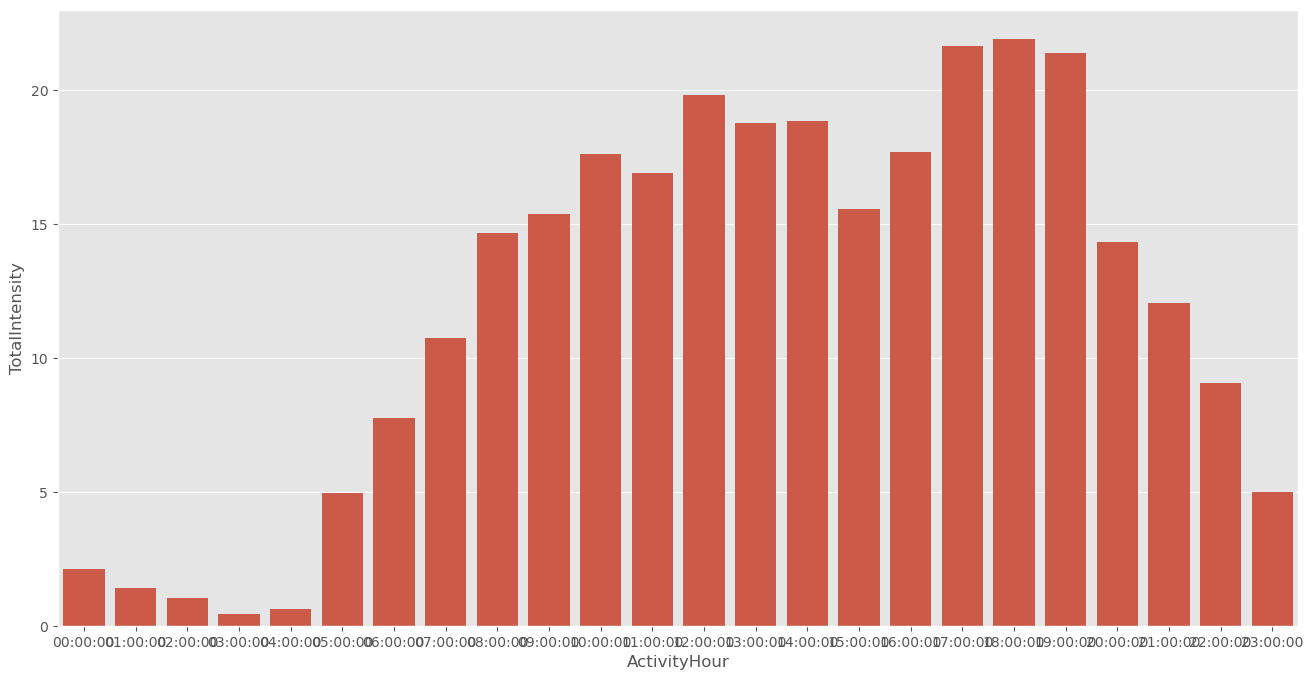

In [24]:
plt.figure(figsize=(16, 8))

sns.barplot(df_hourly_grouped, x='ActivityHour', y='TotalIntensity')

plt.show()